# Artificial Neural Networks : Risk of Heart Disease

[Cleveland Clinic Foundation](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

## Importing libraries

In [1]:
# Data wrangling packages
import numpy as np
import pandas as pd
import scipy

# Graphics packages
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Importing Tensorflow (main library for machine learning)
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')  
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)    
from tensorflow import keras        
from tensorflow.keras import layers 

# Customized functions
import preditiva_EN

# Ensure that results are reproducible
np.random.seed(42)        # Sets the seed for random numbers generated by NumPy
tf.random.set_seed(42)    # Sets the seed for random numbers generated by TensorFlow

## Importing database

In [2]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(file_url)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


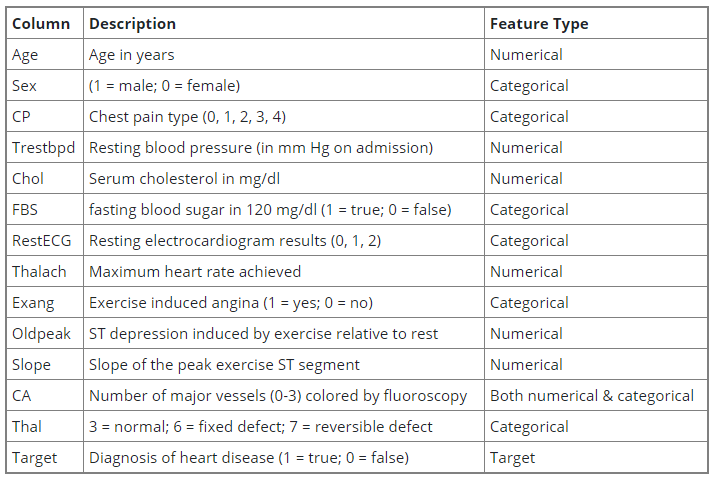

##  Data Wrangling

### Missing Values

In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Duplications

In [4]:
df.duplicated().sum()

0

### Features types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [6]:
# Converting numerical features in categorical features
df['cp'] = df['cp'].astype(object)
df['restecg'] = df['restecg'].astype(object)
df['ca_cat'] = df['ca'].astype(object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
 14  ca_cat    303 non-null    object 
dtypes: float64(1), int64(10), object(4)
memory usage: 35.6+ KB


## Exploratory Data Analysis

### Dispersion by Class

c:\Projetos\ML\ml_venv\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\Projetos\ML\ml_venv\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\Projetos\ML\ml_venv\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\Projetos\ML\ml_venv\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\Projetos\ML\ml_venv\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\Projetos\ML\ml_venv\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidt

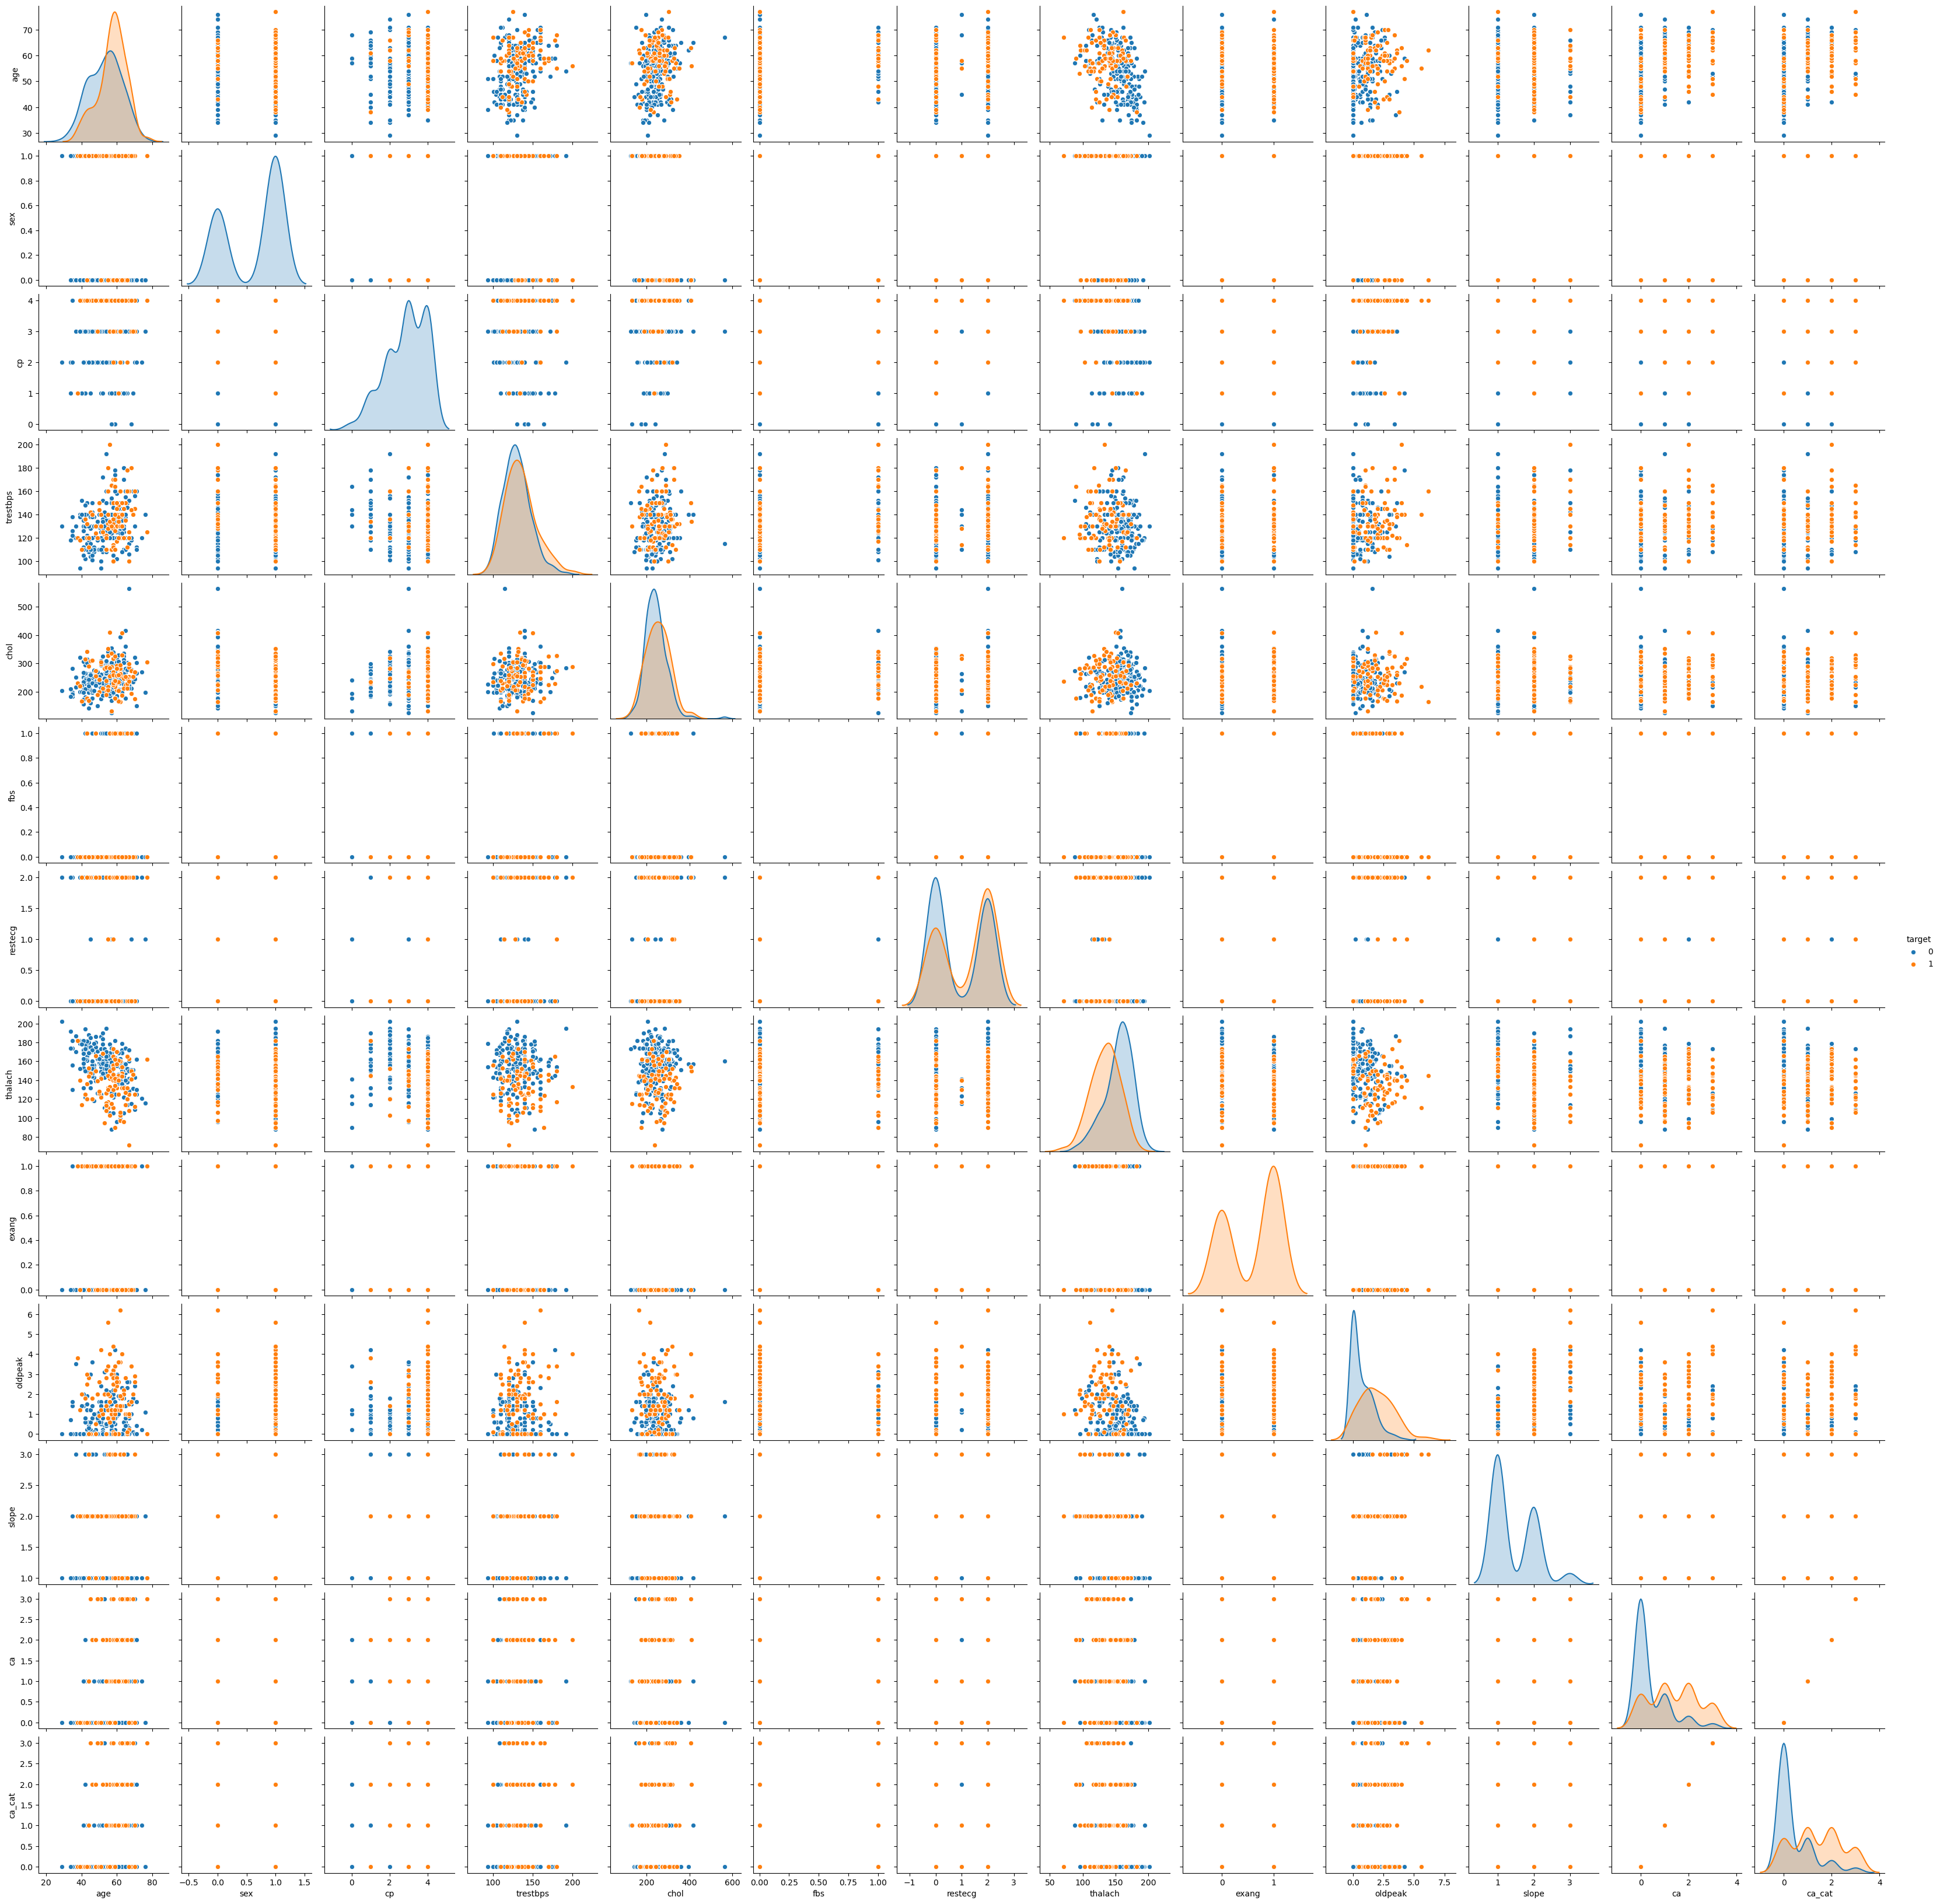

In [8]:
matplotlib.use('module://ipykernel.pylab.backend_inline')
sns.pairplot(df, hue='target');

### Pandas Profiling and SweetViz Report

In [9]:
perfil_pp, perfil_sv = preditiva_EN.generate_eda_reports(df=df,
                                                        target_feat='target')
sns.reset_defaults()

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 59.80it/s]
:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report base_eda_sv.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Modelling Development
To develop Artificial Neural Networks is used one of the most popular libraries: [Tensorflow](https://www.tensorflow.org/?hl=pt-br)

###  Defining *Target* and *Features*

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
 14  ca_cat    303 non-null    object 
dtypes: float64(1), int64(10), object(4)
memory usage: 35.6+ KB


In [11]:
# Target 
y_var = 'target'
y = df[y_var]

# Features
# Numerical Features
x_var_num = [
    'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach',
     'exang', 'oldpeak', 'slope', 'ca',
    ]
x_num = df[x_var_num].to_numpy()

# Categorical Features
x_var_cat = ['cp', 'restecg', 'thal', 'ca_cat']
x_cat = df[x_var_cat]

### Preprocessing

In [12]:
# Creation of dummies features for categorical features
x_cat_enc = OneHotEncoder()
x_cat = x_cat_enc.fit_transform(x_cat).toarray()

# Unifying databases
x = np.concatenate([x_num, x_cat], axis=1)

### Split Database in Train and Test

In [13]:
# Split in Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=42)

### Scale Standardization

In [14]:
# Scale Standardization using Training Set
x_scaler = StandardScaler()
x_scaler.fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

### RNA MLP Definition

In [15]:

model = keras.Sequential()

# Hidden Layer 1
model.add(layers.Dense(4, 
                       activation='tanh', 
                       kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01),
                       input_dim=x_train_scaled.shape[1]))
model.add(layers.Dropout(0.2))

# Hidden Layer 2
model.add(layers.Dense(8, 
                       activation='relu', 
                       kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01),
                       input_dim=x_train_scaled.shape[1]))
model.add(layers.Dropout(0.1))


# Output Layer
model.add(layers.Dense(1, activation='sigmoid'))

# Model Compilation
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(),
              metrics=keras.metrics.AUC(name='auc'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 112       
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


### ANN Evaluation before training

In [16]:
# Evaluates the model on training and test data and prints the AUC scores formatted as percentages

score_train, metric_train = model.evaluate(x_train_scaled, y_train, verbose=0)
score_test, metric_test = model.evaluate(x_test_scaled, y_test, verbose=0)

print('AUC Training Set: {:.1%}'.format(metric_train))
print('AUC Test Set: {:.1%}'.format(metric_test))

AUC Training Set: 23.7%
AUC Test Set: 16.4%


### ANN MLP Training

In [17]:
# Stops training if validation AUC does not improve by at least 0.01 after 20 epochs,
# restoring the best weights found
rna_es = tf.keras.callbacks.EarlyStopping(
    monitor="val_auc",
    min_delta=0.01,
    patience = 20,
    verbose=2,
    mode='max',
    restore_best_weights=True)

# Trains the model for 50 epochs using 10% of the data for validation,
# applying the early stopping callback

history = model.fit(x=x_train_scaled, 
                     y=y_train,
                     epochs=50,
                     batch_size=8,
                     validation_split=0.1,
                     verbose=1,
                     callbacks=[rna_es])

Epoch 1/50
24/24 [==============================] - 4s 107ms/step - loss: 1.2178 - auc: 0.2814 - val_loss: 1.1403 - val_auc: 0.2235
Epoch 2/50
24/24 [==============================] - 0s 4ms/step - loss: 1.1529 - auc: 0.3706 - val_loss: 1.0894 - val_auc: 0.2706
Epoch 3/50
24/24 [==============================] - 0s 5ms/step - loss: 1.0791 - auc: 0.4449 - val_loss: 1.0430 - val_auc: 0.3647
Epoch 4/50
24/24 [==============================] - 0s 4ms/step - loss: 1.0429 - auc: 0.4651 - val_loss: 1.0033 - val_auc: 0.4235
Epoch 5/50
24/24 [==============================] - 0s 5ms/step - loss: 0.9980 - auc: 0.5599 - val_loss: 0.9691 - val_auc: 0.5000
Epoch 6/50
24/24 [==============================] - 0s 5ms/step - loss: 0.9639 - auc: 0.6103 - val_loss: 0.9337 - val_auc: 0.5824
Epoch 7/50
24/24 [==============================] - 0s 5ms/step - loss: 0.9333 - auc: 0.6623 - val_loss: 0.9021 - val_auc: 0.6353
Epoch 8/50
24/24 [==============================] - 0s 4ms/step - loss: 0.8962 - auc: 0.

### Performance Analysis

In [18]:
# Evaluates model performance on training and test sets,
# displaying the AUC scores for each

score_train, metric_train = model.evaluate(x_train_scaled, y_train, verbose=0)
score_test, metric_test = model.evaluate(x_test_scaled, y_test, verbose=0)

print('AUC Training Set: {:.1%}'.format(metric_train))
print('AUC Test Set: {:.1%}'.format(metric_test))

AUC Training Set: 93.2%
AUC Test Set: 91.2%


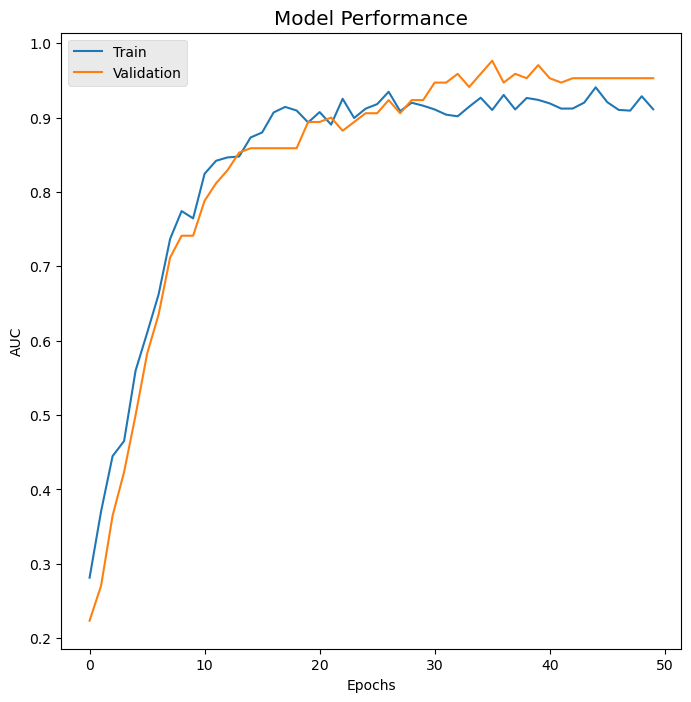

In [19]:
# Plots the AUC evolution for training and validation sets across all epochs
auc_train = list(history.history.keys())[1]
auc_valid = list(history.history.keys())[3]

# Training Evolution Graph
fig, ax = plt.subplots(figsize=(8, 8))
plt.style.use('ggplot')
plt.plot(history.history[auc_train])
plt.plot(history.history[auc_valid])
plt.title('Model Performance')
plt.ylabel('AUC')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Exploring Hyperparameters

In [20]:
# Defines, compiles, trains, and evaluates a neural network model using a specific architecture
# based on the provided hyperparameters (number of neurons and dropout rate).
# Returns the trained model and AUC scores for both training and test sets.
def train_ann(x_train_scaled, y_train, x_test_scaled, y_test, nhl1, dr1, nhl2):

    # ANN Model Definition
    model = keras.Sequential()          

    # Hidden Layer 1
    model.add(layers.Dense(nhl1, 
                           activation='tanh', 
                           kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01),
                           input_dim=x_train_scaled.shape[1]))
    model.add(layers.Dropout(dr1))

    # Hidden Layer 2
    model.add(layers.Dense(nhl2, 
                           activation='relu', 
                           kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)))

    # Output Layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Model Compilation
    model.compile(loss='binary_crossentropy', 
                  optimizer=keras.optimizers.Adam(),
                  metrics=keras.metrics.AUC(name='auc'))


    # ANN Model Training
    rna_es = tf.keras.callbacks.EarlyStopping(
    monitor="val_auc",
    min_delta=0.01,
    patience = 5,
    verbose=0,
    mode='max',
    restore_best_weights=True)

    history = model.fit(x=x_train_scaled, 
                          y=y_train,
                          epochs=50,
                          batch_size=32,
                          validation_split=0.1,
                          verbose=0,
                          callbacks=[rna_es])


    
    # Evaluating the Performance of the ANN Model
    score_train, metric_train = model.evaluate(x_train_scaled, y_train, verbose=0)
    score_test, metric_test = model.evaluate(x_test_scaled, y_test, verbose=0)

    
    return model, (metric_train, metric_test)

In [21]:
4*3*4

48

In [22]:
for r in range(1, 5):
    print(r)

1
2
3
4


In [23]:
np.arange(0, 0.3, 0.1)

array([0. , 0.1, 0.2])

In [24]:
# Generates multiple neural network models using different combinations of hyperparameters
# (number of neurons in each hidden layer and dropout rate in the first layer)
# For each combination, the model is trained and AUC values (train and test) are stored for later analysis
lst_models = list()                                                 
lst_nhl1 = list()                                                   
lst_dr1 = list()                                                    
lst_nhl2 = list()                                                   
auc_train = list()                                                  
auc_test = list()                                                  

id_model = 0                                                        
for nhl1 in range(1, 5):                                            
    for dr1 in np.arange(0, 0.3, 0.1):                              
        for nhl2 in range(1, 5):                                    
                print(f'Training Model {id_model}')               
                lst_nhl1.append(nhl1)                               
                lst_dr1.append(dr1)
                lst_nhl2.append(nhl2)
                model, auc = train_ann(x_train_scaled, y_train,   
                                         x_test_scaled, y_test,
                                         nhl1, dr1, nhl2)
                lst_models.append(model)                           
                auc_train.append(auc[0])                            
                auc_test.append(auc[1])                             
                id_model += 1

Training Model 0
Training Model 1
Training Model 2
Training Model 3
Training Model 4
Training Model 5
Training Model 6
Training Model 7
Training Model 8
Training Model 9
Training Model 10
Training Model 11
Training Model 12
Training Model 13
Training Model 14
Training Model 15
Training Model 16
Training Model 17
Training Model 18
Training Model 19
Training Model 20
Training Model 21
Training Model 22
Training Model 23
Training Model 24
Training Model 25
Training Model 26
Training Model 27
Training Model 28
Training Model 29
Training Model 30
Training Model 31
Training Model 32
Training Model 33
Training Model 34
Training Model 35
Training Model 36
Training Model 37
Training Model 38
Training Model 39
Training Model 40
Training Model 41
Training Model 42
Training Model 43
Training Model 44
Training Model 45
Training Model 46
Training Model 47


In [25]:
# Creates a DataFrame combining tested hyperparameters, AUC values (Train and Test), and the trained models
# Also calculates the difference between AUC Test and AUC Train to assess model stability
ann_search_results = pd.DataFrame(list(zip(lst_nhl1, lst_dr1, lst_nhl2, auc_train, auc_test, lst_models)),   
                        columns=['Neurons HL1', 'Dropout HL1',                                  
                                 'Neurons HL2',
                                 'AUC Train', 'AUC Test', 
                                 'Model'
                                ])
ann_search_results['Difference']= ann_search_results['AUC Test'] - ann_search_results['AUC Train']                             
ann_search_results                                                                                           

,Neurons HL1,Dropout HL1,Neurons HL2,AUC Train,AUC Test,Model,Difference
0,1,0.0,1,0.737344,0.747512,<tensorflow.python.keras.engine.sequential.Seq...,0.010169
1,1,0.0,2,0.365404,0.256841,<tensorflow.python.keras.engine.sequential.Seq...,-0.108563
2,1,0.0,3,0.667774,0.542289,<tensorflow.python.keras.engine.sequential.Seq...,-0.125486
3,1,0.0,4,0.478509,0.484453,<tensorflow.python.keras.engine.sequential.Seq...,0.005944
4,1,0.1,1,0.288246,0.390547,<tensorflow.python.keras.engine.sequential.Seq...,0.102301
5,1,0.1,2,0.837875,0.884950,<tensorflow.python.keras.engine.sequential.Seq...,0.047075
6,1,0.1,3,0.576437,0.606343,<tensorflow.python.keras.engine.sequential.Seq...,0.029906
7,1,0.1,4,0.425058,0.435323,<tensorflow.python.keras.engine.sequential.Seq...,0.010265
8,1,0.2,1,0.544256,0.444652,<tensorflow.python.keras.engine.sequential.Seq...,-0.099604
9,1,0.2,2,0.307799,0.305970,<tensorflow.python.keras.engine.sequential.Seq...,-0.001829


In [26]:
# Generates line plots to analyze how a hyperparameter influences model performance
# (AUC Train, AUC Test, and their difference)
def hyperparameter_analysis(hp, search):                             
    matplotlib.use('module://ipykernel.pylab.backend_inline')       
    sns.set()                                                       

    fig, axes = plt.subplots(1, 2, figsize=(9, 4))                    
    fig.suptitle(t='Hyperparameter Analysis: '+hp, fontsize=12)     

    sns.lineplot(ax=axes[0], x=search[hp], y=search['AUC Train'])     
    sns.lineplot(ax=axes[0], x=search[hp], y=search['AUC Test'])        
    axes[0].legend(labels=['Train', 'Test'])                      

    sns.lineplot(ax=axes[1], x=search[hp], y=search['Difference'])     

    fig.tight_layout()
    plt.show()
    plt.close(fig)                                              

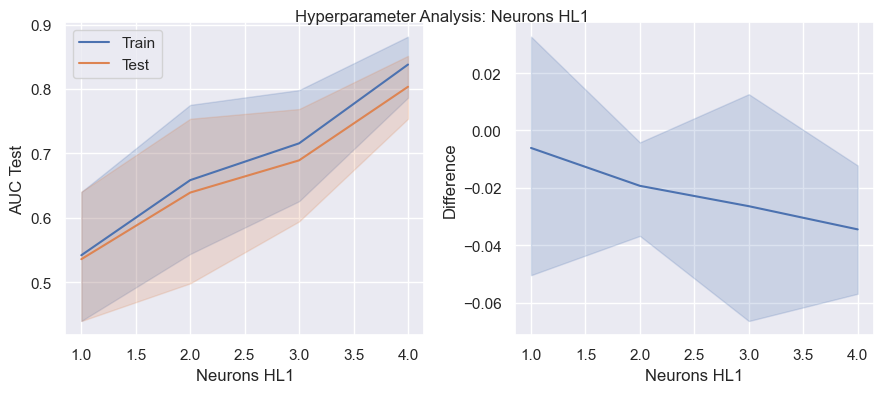

In [27]:
hyperparameter_analysis('Neurons HL1', ann_search_results) 

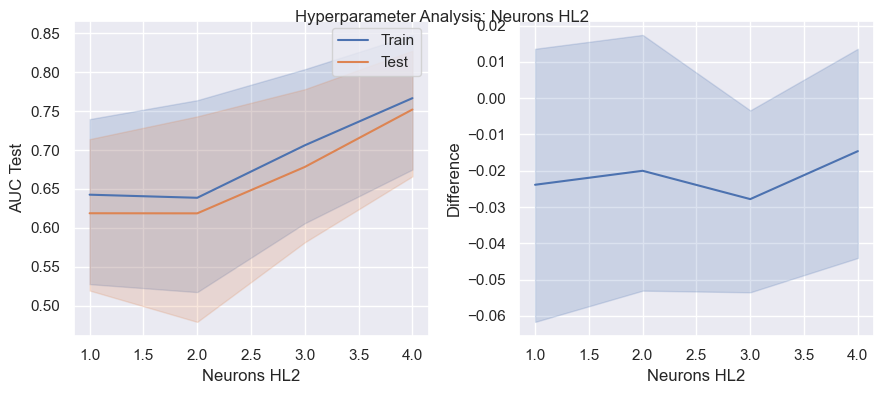

In [28]:
hyperparameter_analysis('Neurons HL2', ann_search_results)

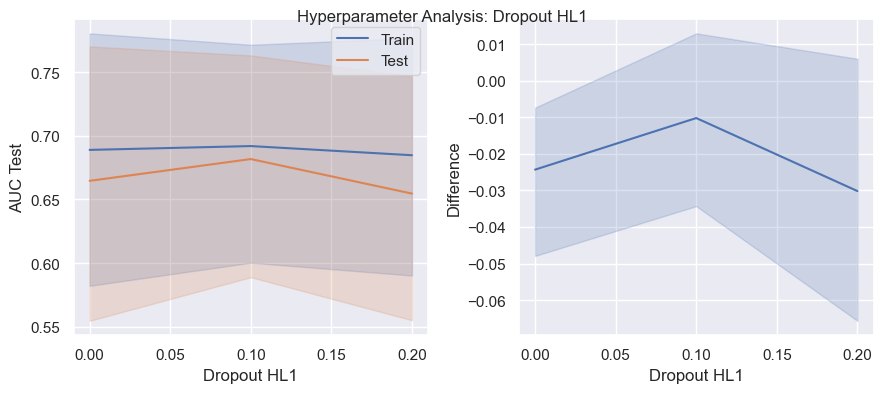

In [29]:
hyperparameter_analysis('Dropout HL1', ann_search_results)

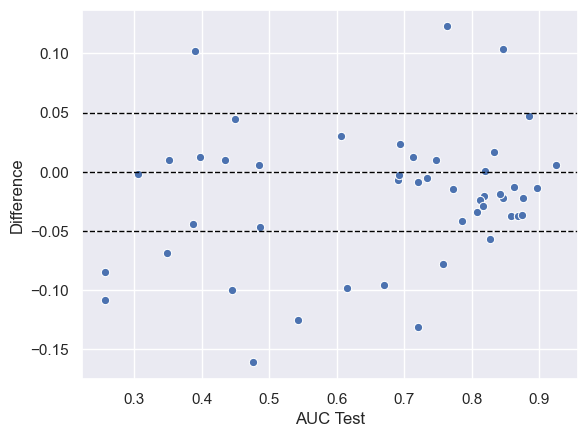

In [30]:
# Generates a scatterplot of AUC Test vs Difference (Train - Test)
# with horizontal reference lines marking the acceptable difference range (-0.05 to 0.05)
performance_graph = sns.scatterplot(ann_search_results['AUC Test'], 
                              ann_search_results['Difference'])
ax1 = performance_graph.axes
ax1.axhline( 0, color='black', ls='--', linewidth = 1)
ax1.axhline(-0.05, color='black', ls='--', linewidth = 1)
ax1.axhline( 0.05, color='black', ls='--', linewidth = 1)
plt.show()

In [31]:
# Filtering models with low AUC difference (Train vs Test)
# and high AUC Test (> 0.88), then sorting to find the most stable and performant one.
ann_search_results.loc[
    (ann_search_results['Difference'] > -0.05) &
    (ann_search_results['Difference'] <  0.05) &
    (ann_search_results['AUC Test'] > 0.88)
    ].sort_values(by=['Difference', 'AUC Test', 'Neurons HL1', 'Neurons HL2'],
                  ascending=[True, False, True, True])

,Neurons HL1,Dropout HL1,Neurons HL2,AUC Train,AUC Test,Model,Difference
47,4,0.2,4,0.910269,0.896144,<tensorflow.python.keras.engine.sequential.Seq...,-0.014125
38,4,0.0,3,0.919242,0.924751,<tensorflow.python.keras.engine.sequential.Seq...,0.005509
5,1,0.1,2,0.837875,0.884950,<tensorflow.python.keras.engine.sequential.Seq...,0.047075


#### “Among the selected models with stable generalization (AUC Train ≈ AUC Test), model #35 achieved the highest AUC Test (0.92), with a still acceptable gap of 0.025 between training and testing performance — making it a strong candidate for final prediction.”



## Estimating a New Patient's Heart Disease Risk

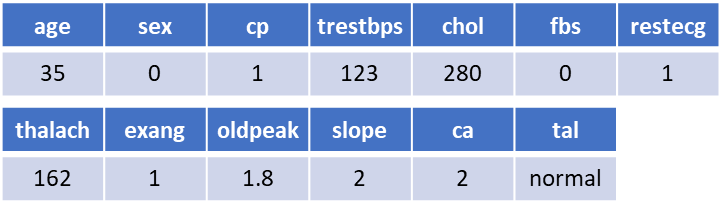

In [32]:
# creating a dataframe with features above
df_patient = pd.DataFrame.from_dict({'age':[35],
                                     'sex':[0],
                                     'cp':[1],
                                     'trestbps':[123],
                                     'chol':[280],
                                     'fbs':[0],
                                     'restecg':[1],
                                     'thalach':[162],
                                     'exang':[1],
                                     'oldpeak':[1.8],
                                     'slope':[2],
                                     'ca':[2],
                                     'thal':['normal']
                                    })

df_patient

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,35,0,1,123,280,0,1,162,1,1.8,2,2,normal


In [33]:
# Preprocessing X Features
def preprocess_x(df, x_cat_enc, x_scaler):
    
    # Converting de numerical features to categorical features
    df['cp'] = df['cp'].astype(object)
    df['restecg'] = df['restecg'].astype(object)
    df['ca_cat'] = df['ca'].astype(object)

    # Features 
    # Numerical Features
    x_var_num = [
        'age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach',
         'exang', 'oldpeak', 'slope', 'ca',
        ]
    x_num = df[x_var_num].to_numpy()

    # Categorical Features
    x_var_cat = ['cp', 'restecg', 'thal', 'ca_cat']
    x_cat = df[x_var_cat]

    # Creating dummy variables for categorical variables
    x_cat = x_cat_enc.transform(x_cat).toarray()

    # Unifying Database
    x = np.concatenate([x_num, x_cat], axis=1)

    x_scaled = x_scaler.transform(x)
    
    return x_scaled

In [34]:
# Lists all categories (unique values) learned by OneHotEncoder for each categorical feature
x_cat_enc.categories_

[array([0, 1, 2, 3, 4], dtype=object),
 array([0, 1, 2], dtype=object),
 array(['1', '2', 'fixed', 'normal', 'reversible'], dtype=object),
 array([0, 1, 2, 3], dtype=object)]

In [35]:
# Shows the variance of each numerical feature computed by StandardScaler before scaling
x_scaler.var_

array([8.10782084e+01, 2.16157885e-01, 3.18980843e+02, 2.50722114e+03,
       1.31430224e-01, 5.52119326e+02, 2.21164115e-01, 1.31632876e+00,
       4.03168387e-01, 8.80562478e-01, 9.34496262e-03, 7.37584550e-02,
       1.47116412e-01, 1.94375222e-01, 2.48909754e-01, 2.49644001e-01,
       9.34496262e-03, 2.49199003e-01, 4.69473122e-03, 4.69473122e-03,
       6.16767533e-02, 2.47775009e-01, 2.34959060e-01, 2.44993770e-01,
       1.75151299e-01, 1.18080278e-01, 6.16767533e-02])

In [36]:
# Preprocesses the new patient input using the same encoder and scaler used in model training
x_patient = preprocess_x(df_patient, x_cat_enc, x_scaler)
x_patient

array([[-2.13471391, -1.47111492, -0.50788001,  0.63860667, -0.42936877,
         0.52816366,  1.42427927,  0.66685714,  0.65373777,  1.38737266,
        -0.09759001,  3.38682569, -0.46732302, -0.59914469, -0.93600545,
        -1.0384755 , 10.24695077, -0.94491118, -0.06884284, -0.06884284,
        -0.26590801,  0.90971765, -0.77849894, -1.15311332, -0.54100178,
         2.51203997, -0.26590801]])

In [37]:
# Retrieves the trained neural network model stored at index 35 in the results table
selected_model = ann_search_results.iloc[35]['Model']

In [38]:
# Displays custom metrics stored in the selected model 
selected_model.metrics

In [39]:
# Generates prediction (probability) for the new patient using the selected trained model
selected_model.predict(x_patient)

array([[0.49460265]], dtype=float32)